In [25]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Univariate analysis

`Analysing AGE Feature - Numerical`

In [35]:
print('Mean:-',df['age'].mean())
print('Median:-',df['age'].median())
print("Std:-",df['age'].std())
print("min:-",df['age'].min())
print("max:-",df['age'].max())

Mean:- 39.222139117427076
Median:- 39.0
Std:- 14.044332734156422
min:- 18
max:- 64


In [22]:
dfagev=df['age'].max()-df['age'].min()
dfagev

46

<AxesSubplot:>

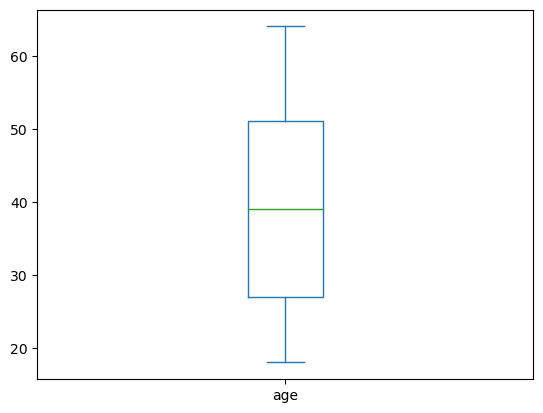

In [23]:
df['age'].plot(kind='box')

In [ ]:
#insights:-
#We can observe that there are No outliers Detected in the Age Feature

<AxesSubplot:ylabel='Density'>

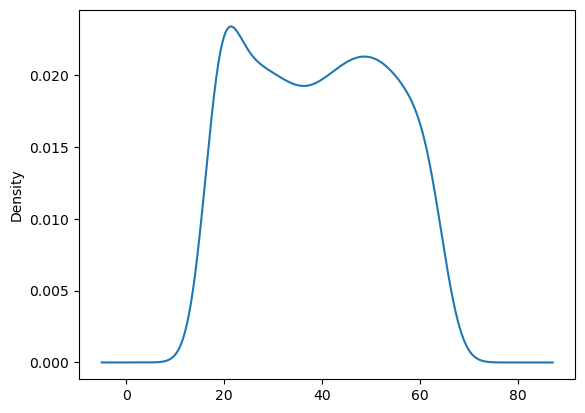

In [24]:
df['age'].plot(kind='kde')

In [ ]:
#Insights:-
#from the above analysis we can observe that the distribution is almost the uniform distribution.

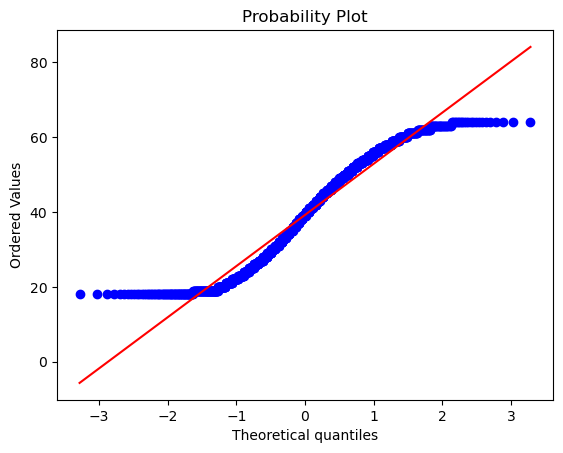

In [26]:
stats.probplot(df['age'],dist='norm',plot=plt)
plt.show()

In [123]:
# Insights:-
#from the above QQ-plot we can see that the data is not in normal distribution

`Analysing bmi Feature - Numerical`

In [36]:
print('Mean:-',df['bmi'].mean())
print('Median:-',df['bmi'].median())
print("Std:-",df['bmi'].std())
print("min:-",df['bmi'].min())
print("max:-",df['bmi'].max())

Mean:- 30.663451757666405
Median:- 30.4
Std:- 6.100468409615801
min:- 15.96
max:- 53.13


<AxesSubplot:ylabel='Density'>

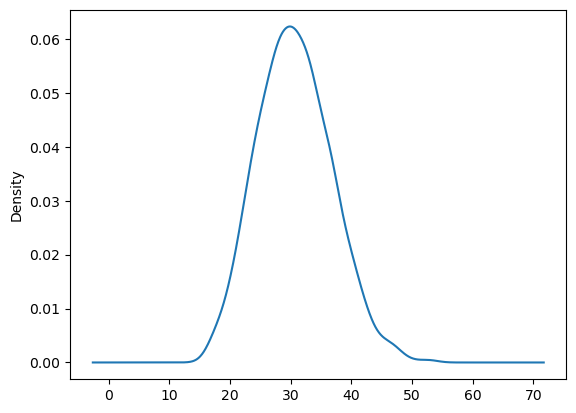

In [37]:
df['bmi'].plot(kind='kde')

In [ ]:
#Insights:-
#from the above KDE-plot we can see that the data is normally distributed

<AxesSubplot:>

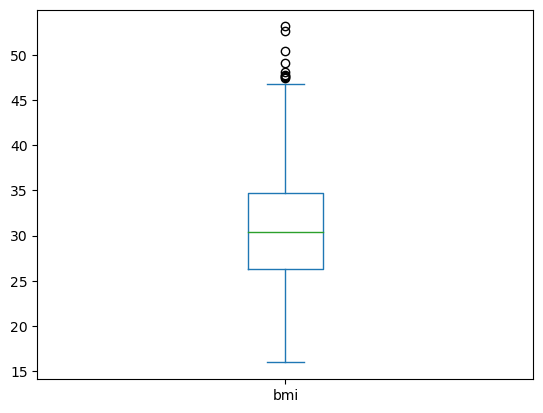

In [38]:
df['bmi'].plot(kind='box')

In [ ]:
#Insights:-
#from the above Box-plot we can detect the outLiers.

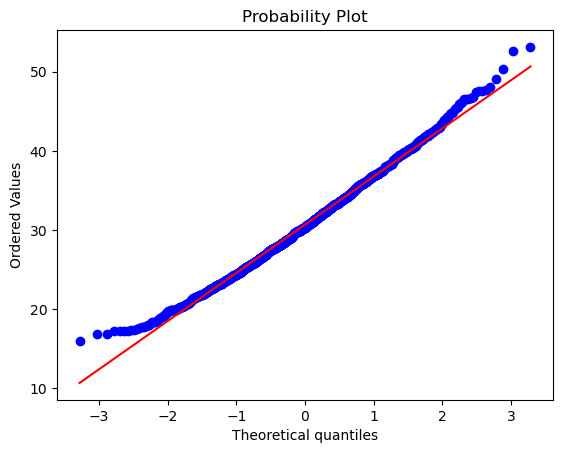

In [172]:
stats.probplot(df['bmi'],dist='norm',plot=plt)
plt.show()

In [173]:
#Insights:-
#from the above QQ-plot we can see that the data is almost normally distributed

##### Outlier Treatment

In [174]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 26.29
Q3 = 34.7
IQR = 8.410000000000004
lower = 13.674999999999994
Upper = 47.31500000000001


In [175]:
df_clean=df[(df['bmi']>lower)&(df['bmi']<upper)]

In [176]:
print('After Treating Outliers:',df_clean.shape)

After Treating Outliers: (1328, 7)


<AxesSubplot:>

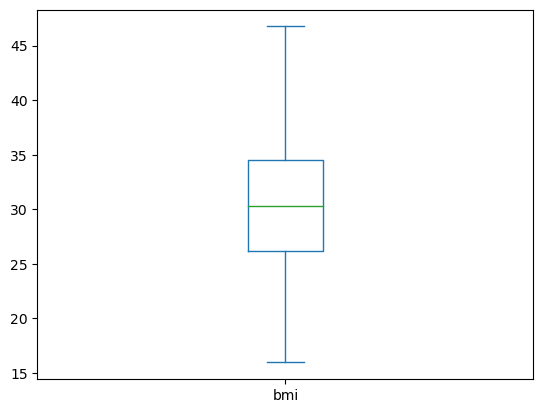

In [177]:
df_clean['bmi'].plot(kind='box')

In [178]:
#Insights:-
# After the treating of outliers we can oberve that there are no outliers present in the 'bmi' feature.

<AxesSubplot:ylabel='Density'>

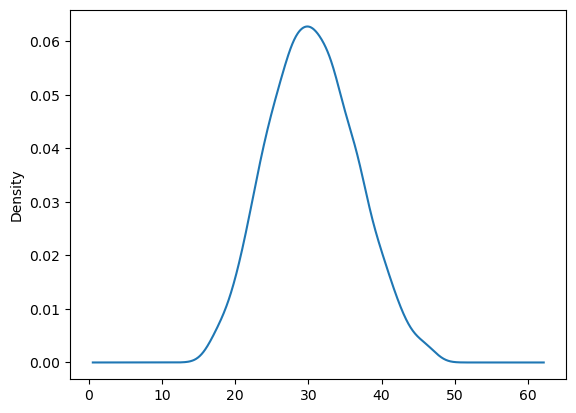

In [179]:
df_clean['bmi'].plot(kind='kde')

In [180]:
#Insights:-
#From the above plot we can analyze that the data is uniformly distributed in BMI column after the Outlier Treatment.

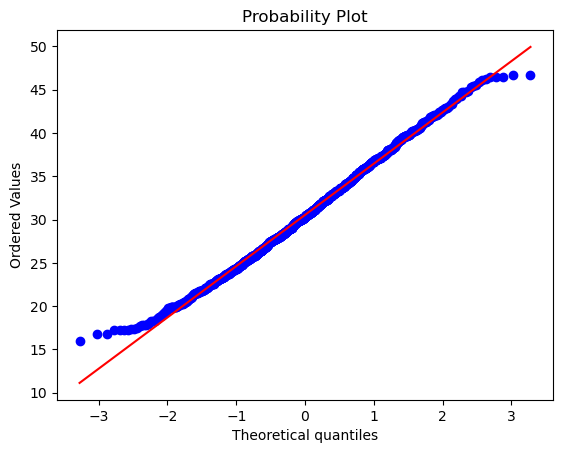

In [181]:
stats.probplot(df_clean['bmi'],plot=plt)
plt.show()

In [182]:
#Insights:-
#from the above QQ-plot we can see that the data is almost normally distributed

`Analysing children feature - Numerical`

In [183]:
print('min:',df['children'].min())
print('max:',df['children'].max())
print('mean:',df['children'].mean())
print('median:',df['children'].median())
print('std:',df['children'].std())

min: 0
max: 5
mean: 1.0957367240089753
median: 1.0
std: 1.2055714286412185


In [184]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:>

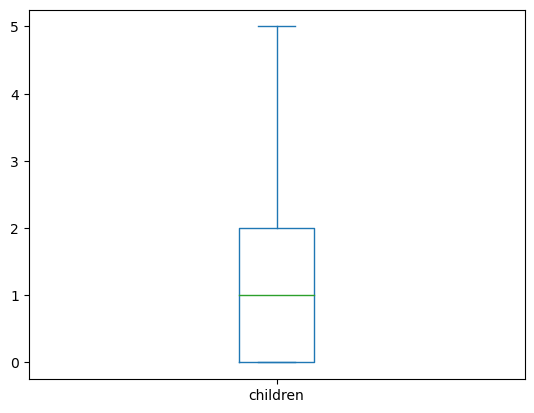

In [185]:
df['children'].plot(kind = 'box')

In [186]:
#Insights:-
#from the above Box-plot we can see that there are no outliers detected

<AxesSubplot:ylabel='Density'>

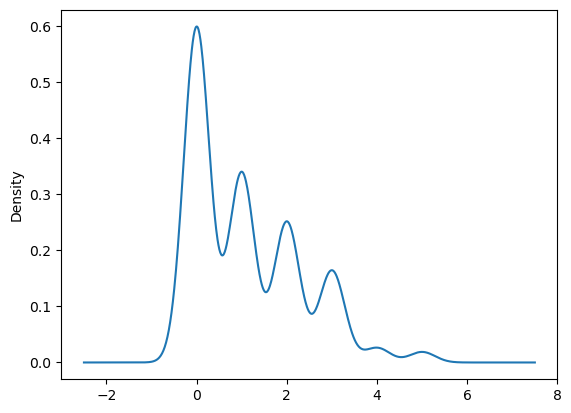

In [187]:
df['children'].plot(kind = 'kde')

In [188]:
##Insights:-
#from the above plot we can conclude that the distribution is not uniform and curve starts from -ve range we cannot apply 
#box-Cox tranformation to convert it into Normal distribution due to -ve values the Log is not defined

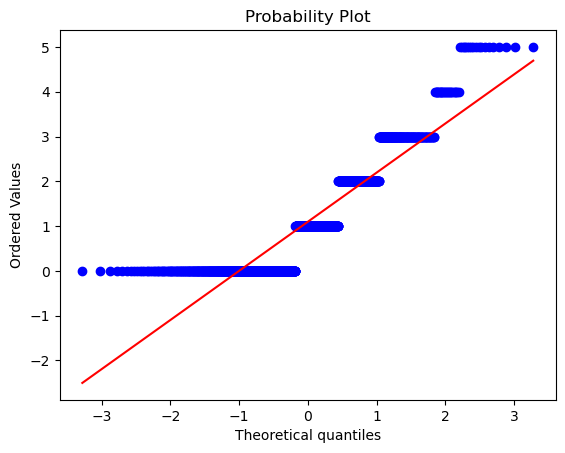

In [189]:
stats.probplot(df['children'],dist='norm',plot=plt)
plt.show()

In [190]:
#Insights:-
#From the above QQ-plot we can analyze that data is not uniformly distributed

#### Outlier Treatment

In [191]:
df_clean1=df_clean['children'].map(lambda x :df_clean["children"].mean() if x<1 else x)

<AxesSubplot:ylabel='Density'>

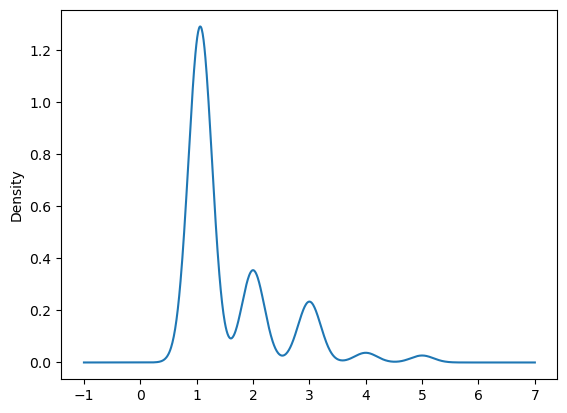

In [192]:
df_clean1.plot(kind = 'kde')

In [193]:
#Insights:-
# After the treating the outliers are not able to convert into postive values so that the BoxCox Transformation is not possible to convert it into Uniform Distribution.

`Analysing charges feature - Numerical`

In [194]:
# charges
print('min:',df['charges'].min())
print('max:',df['charges'].max())
print('mean:',df['charges'].mean())
print('median:',df['charges'].median())
print('std:',df['charges'].std())

min: 1121.8739
max: 63770.42801
mean: 13279.121486655948
median: 9386.1613
std: 12110.359656344179


<AxesSubplot:>

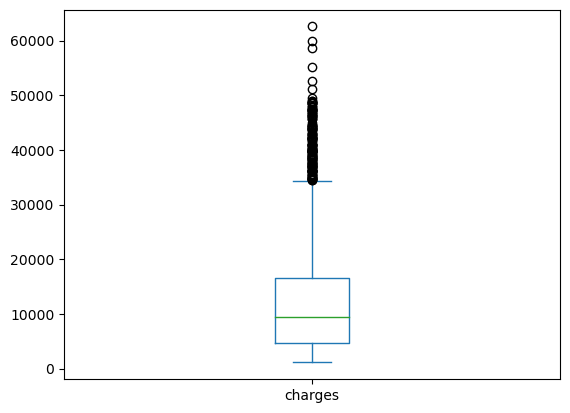

In [195]:
df_clean['charges'].plot(kind='box')

In [196]:
#Insights:-
#from the above Box-plot we can detect the outLiers.

<AxesSubplot:ylabel='Density'>

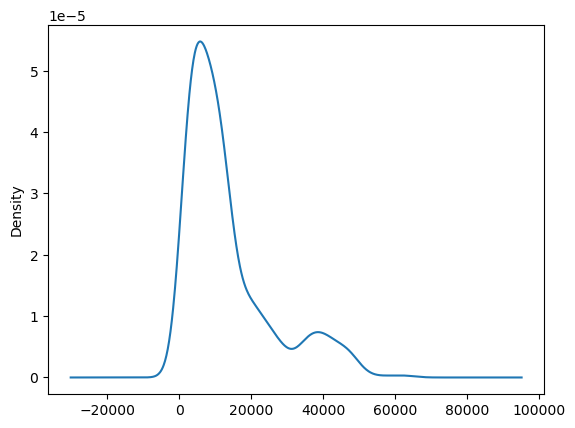

In [197]:
df['charges'].plot(kind = 'kde')

In [198]:
##Insights:-
#from the above plot we can conclude that the distribution is not uniform and curve starts from -ve range we cannot apply 
#box-Cox tranformation to convert it into Normal distribution due to -ve values the Log is not defined

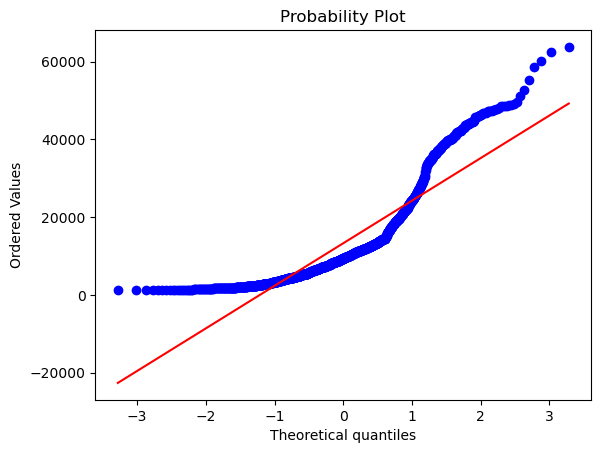

In [199]:
stats.probplot(df['charges'],dist='norm',plot=plt)
plt.show()

In [200]:
#Insights:-
#From the above QQ-plot we can analyze that data is not uniformly distributed

 `Analysing sex Feature - Categorical`

In [201]:
df_clean['sex'].mode()

0    male
Name: sex, dtype: object

In [202]:
df_clean['sex'].value_counts()

male      669
female    659
Name: sex, dtype: int64

<AxesSubplot:>

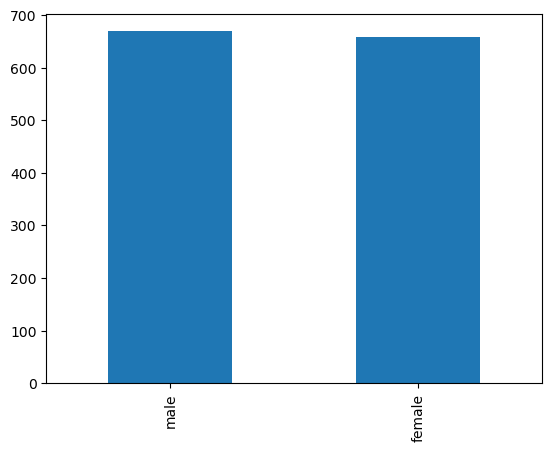

In [203]:
df_clean['sex'].value_counts().plot(kind = 'bar')

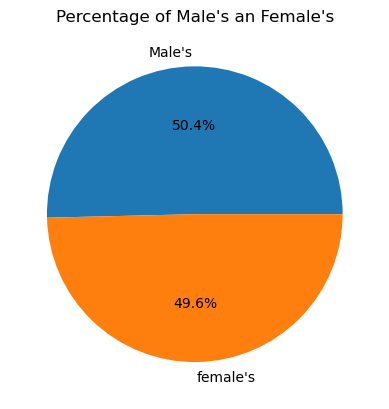

In [204]:
plt.pie(df_clean['sex'].value_counts(),autopct="%1.1f%%",labels=("Male's","female's"))
plt.title("Percentage of Male's an Female's")
plt.show()

In [205]:
#Insights:-
#from the above pie chart we can depict that the male's and females are almost equal in number(i.e males: 50.4%,Female's: 49.6%)

`Analysing region Feature - Categorical`

In [206]:
df_clean['region'].mode()

0    southeast
Name: region, dtype: object

In [84]:
df_clean['region'].value_counts()

southeast    307
northwest    304
northeast    296
southwest    291
Name: region, dtype: int64

<AxesSubplot:>

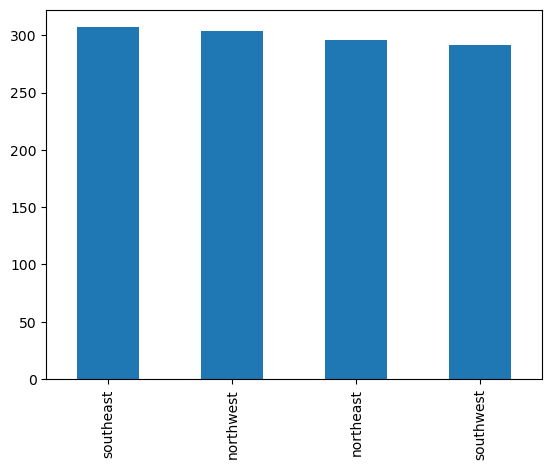

In [86]:
df_clean['region'].value_counts().plot(kind = 'bar')

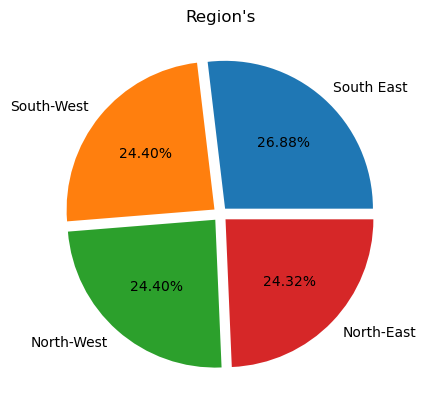

In [207]:
plt.pie(df_clean['region'].value_counts(),explode=[0.05,0.05,0.05,0.05],
        autopct="%1.2f%%",labels=('South East','South-West','North-West','North-East'))
plt.title("Region's")
plt.show()

In [ ]:
#Insights:-
#From the above pie chart we can conclude that the no of persons in Data is approximately equally Distributed in all the regions

`Analysing smoker Feature - Categorical`

In [89]:
df_clean['smoker'].mode()

0    no
Name: smoker, dtype: object

In [90]:
df_clean['smoker'].value_counts()

no     1060
yes     138
Name: smoker, dtype: int64

<AxesSubplot:>

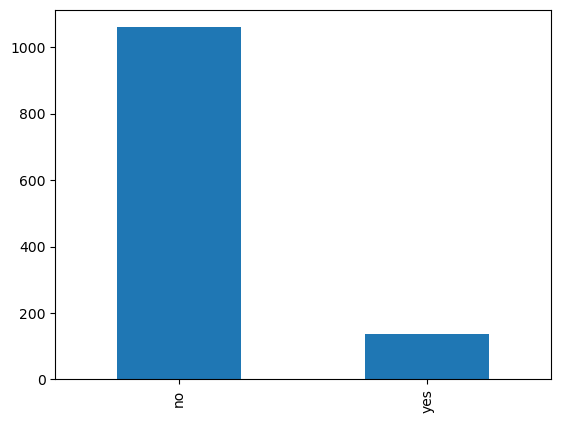

In [91]:
df_clean['smoker'].value_counts().plot(kind = 'bar')

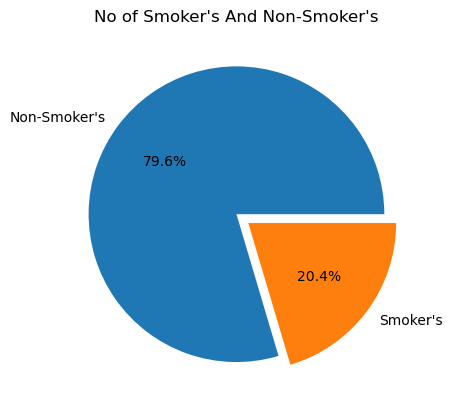

In [208]:
plt.pie(df_clean['smoker'].value_counts(),autopct="%1.1f%%",labels=("Non-Smoker's","Smoker's"), explode=[0,0.1])
plt.title("No of Smoker's And Non-Smoker's")
plt.show()

In [ ]:
#Insights:-
#From the above Pie chart we can conclude that in the Entire Given DataFrame no.of Smokers are 20.4% where as Nonsmokers are 79.6%.

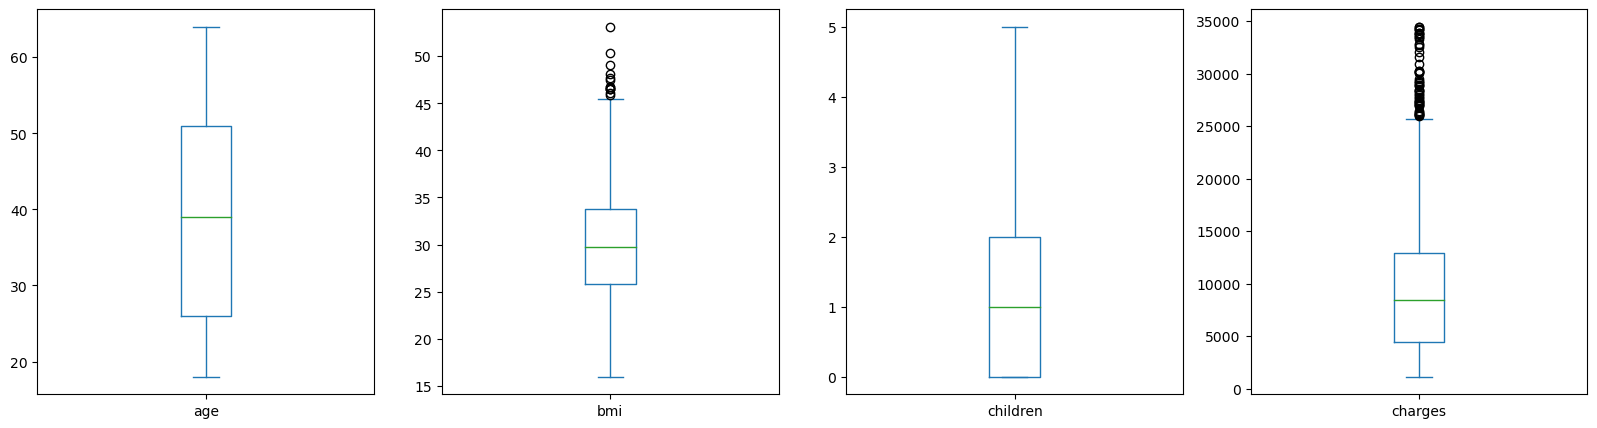

In [122]:
df_clean.plot(kind='box',subplots=(2,4),figsize=(20,5))
plt.show()

In [ ]:
#Insights:-
#hence we can find the outliers in the bmi,charges columns as the charges column is dependent feature,
#we cannot treat the outliers for this column.

# Bivariate

`Relationship between Age and Charges - [Numerical Vs Numerical]`

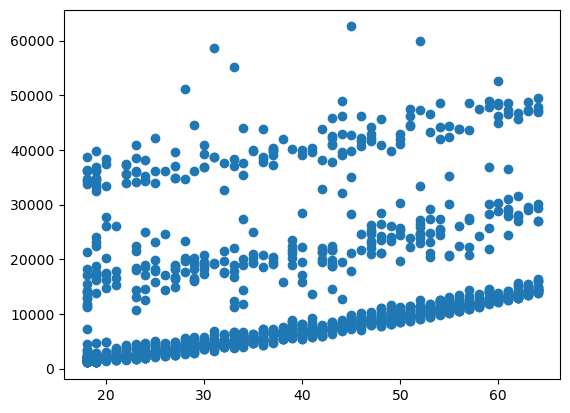

In [209]:
plt.scatter(x=df_clean['age'],y=df_clean['charges'])
plt.show()

#### Cleaned data

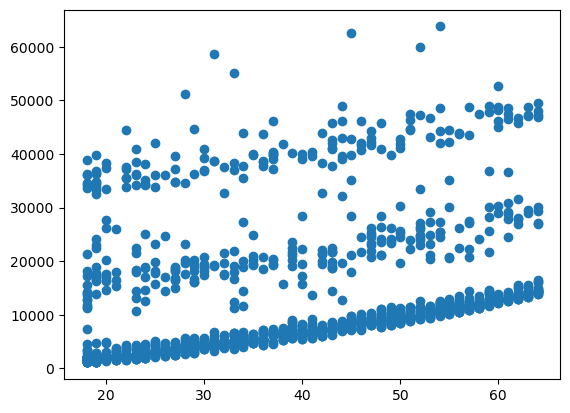

In [210]:
plt.scatter(x=df['age'],y=df['charges'])
plt.show()

In [211]:
#Insights:-
#From the above Scatter plot we can conclude that as the Age increases the Charges for the insurance also increases

`Relationship between bmi and Charges - [Numerical Vs Numerical]`

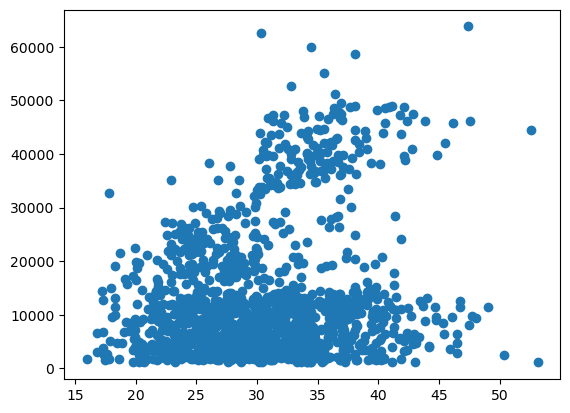

In [212]:
plt.scatter(x = df['bmi'],y = df['charges'])
plt.show()

##### Cleaned data

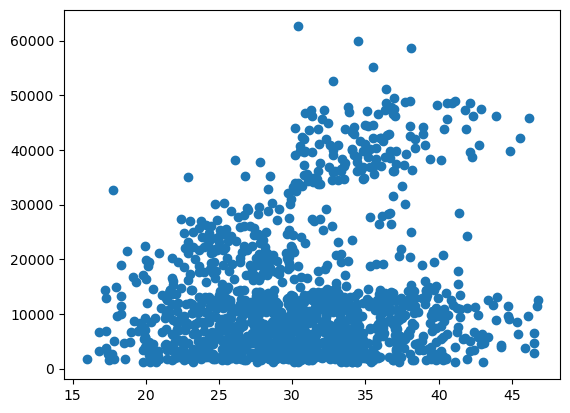

In [213]:
plt.scatter(x = df_clean['bmi'],y = df_clean['charges'])
plt.show()

` Relationship between children and Charges - [Numerical Vs Numerical]`

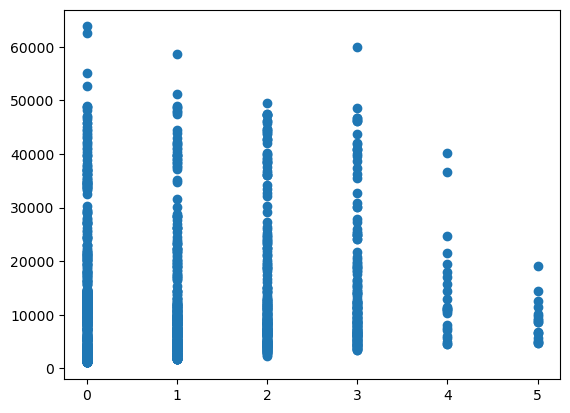

In [214]:
plt.scatter(x=df['children'],y=df['charges'])
plt.show()

##### Cleaned data

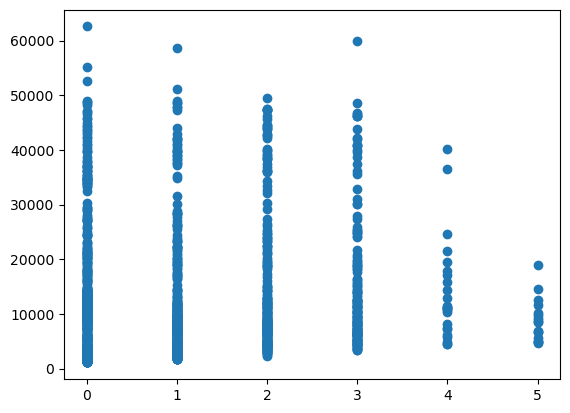

In [215]:
plt.scatter(x=df_clean['children'],y=df_clean['charges'])
plt.show()

`Relationship between sex and Charges - [Categorical Vs Numerical]`

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

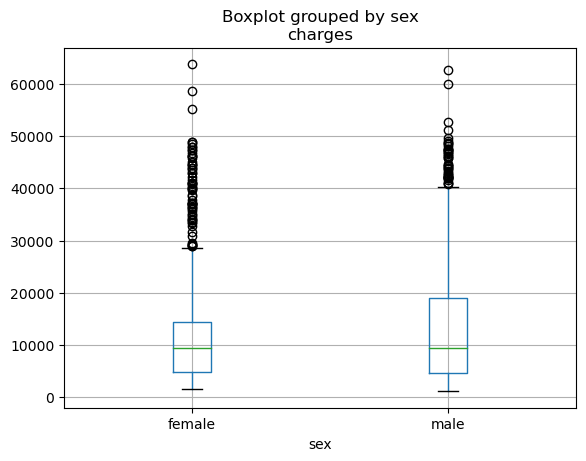

In [103]:
df.boxplot(by='sex', column='charges')

##### Cleaned data 

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

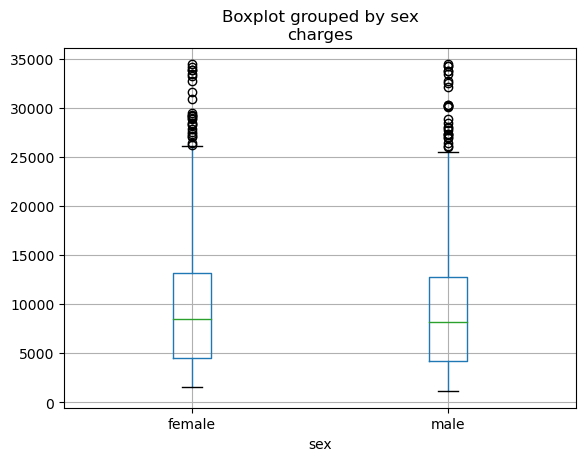

In [104]:
df_clean.boxplot(by='sex', column='charges')

In [ ]:
#Insights:-
# From the the above boxplot we observe that there is no relationship between sex and charges

` Relationship between smoker and Charges - [Categorical Vs Numerical]`

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

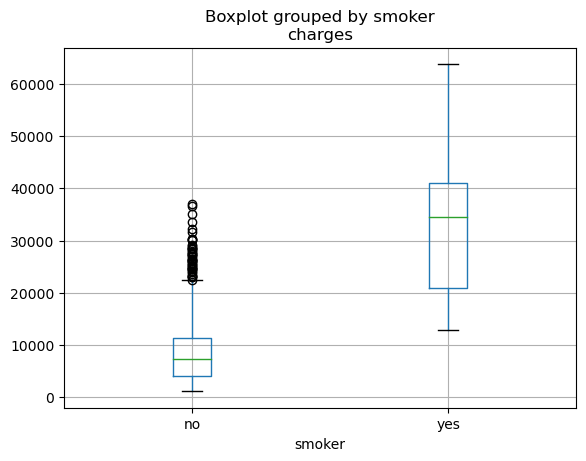

In [105]:
df.boxplot(by='smoker', column='charges')

##### Cleaned data

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

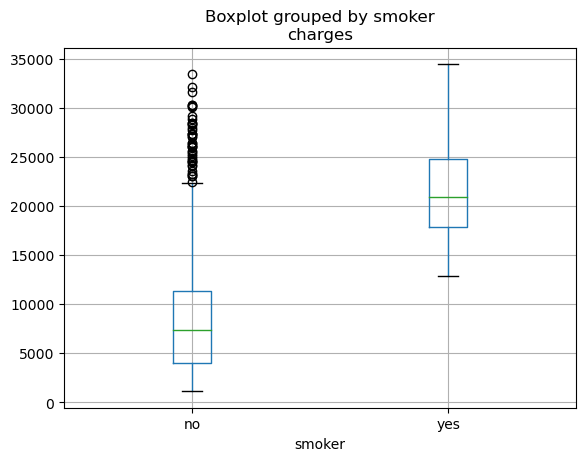

In [106]:
df_clean.boxplot(by='smoker', column='charges')

In [ ]:
#Insights:-
# From the above box-plot we observe that There is Positive relationship between smoker = Yes and charges. 

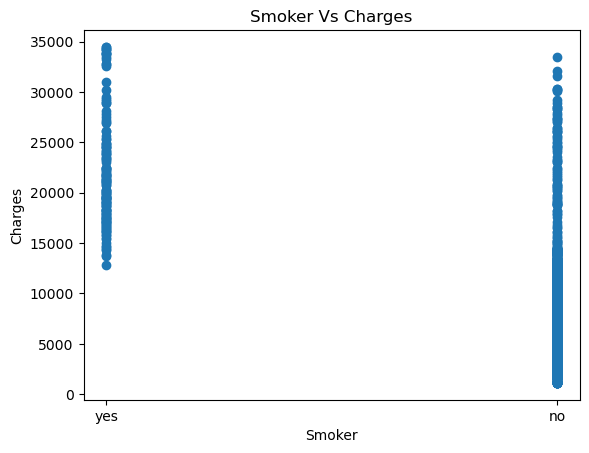

In [119]:
plt.scatter(df_clean['smoker'],df_clean['charges'])
plt.title("Smoker Vs Charges")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

`Relationship between region and Charges - [Categorical Vs Numerical]`

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

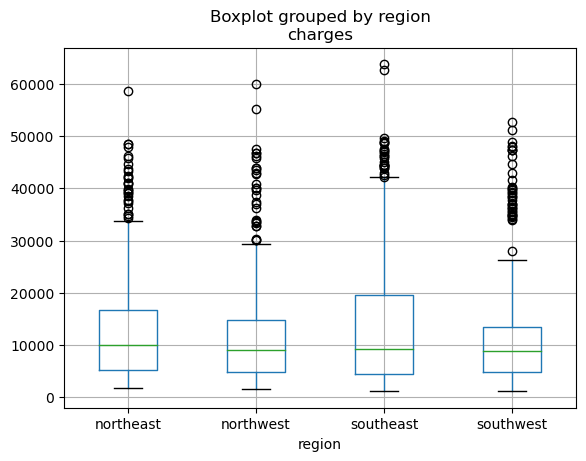

In [107]:
df.boxplot(by='region', column='charges')

##### Cleaned data

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

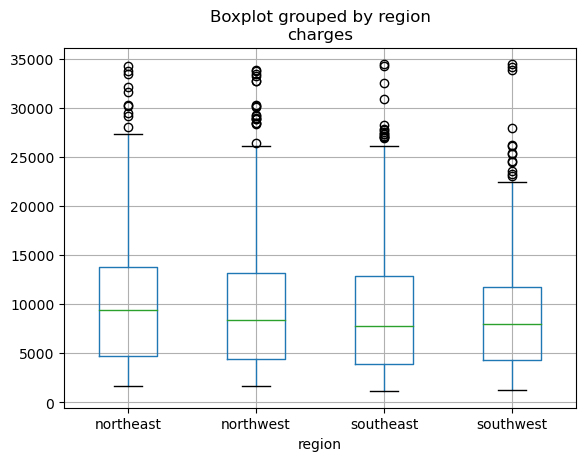

In [108]:
df_clean.boxplot(by='region', column='charges')

In [ ]:
#Insights:-
# From the above plot we can see that There is no relationship between region and charges.  

# Conclusion :

Conclusion :-
As Per EDA we can conclude that " Age " and " Smoker " are the columns which will have adverse Effects on "Charges" column . And Male's and Female's are likely to Take the Health insurance.

# Recommendations :

-> As per the EDA anlaysis the insurance company should focus the cusotmer who have more dependents, and capture the business by targeting the people who are in the age group of 24 to 40 as this is their earning stage. And create Awareness about the Health Insurance by campaigns.
->And the insurance company should also focus on the good Salaried customer Segments in their initial stages of earnings by telling that as the " Age " increases the risk factor,spendings,and other liabilities also increases,so bring awareness about risk factors of "Age", so that insurance companies could capture good amounts of business and Cusotmer's Trust as well.
-> Apart form this we could also improve the business numbers by targetting the smoker's based on the risk factor of they smoke daily, because as per EDA smoker's need to pay the more charges as compared to non smokers, there is risk factor but in the market the premium(charges) are more, if we put some competitive charges for the smoker's as compared to other insurance companies, that would definetly make good amounts of profits and referrals as well